<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [32]:
iris_data=load_iris()

In [33]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
columns=iris_data.feature_names
df=pd.DataFrame(columns=columns,data=iris_data.data)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [36]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

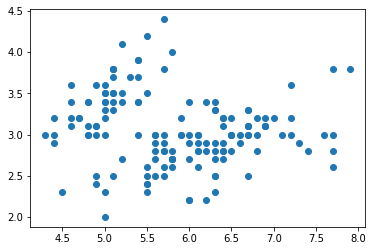

In [37]:
plt.scatter(x=df['sepal length (cm)'],y=df['sepal width (cm)'])
plt.show()

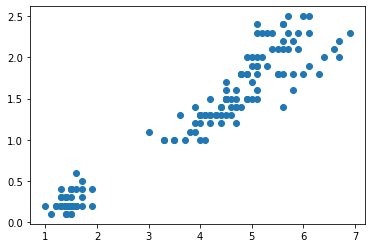

In [38]:
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'])

In [39]:
X=df
y=iris_data.target

In [54]:
from keras.utils.np_utils import to_categorical
cat_y=to_categorical(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,cat_y,test_size=0.33,random_state=101)

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
model=Sequential()

model.add(Dense(8,input_dim=4,activation='relu'))

model.add(Dense(4,input_dim=4,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 15        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test))

Epoch 1/250
4/4 [==============================] - 1s 69ms/step - loss: 1.0954 - accuracy: 0.2229 - val_loss: 1.0847 - val_accuracy: 0.3600
Epoch 2/250
4/4 [==============================] - 0s 17ms/step - loss: 1.0887 - accuracy: 0.2425 - val_loss: 1.0808 - val_accuracy: 0.3800
Epoch 3/250
4/4 [==============================] - 0s 13ms/step - loss: 1.0851 - accuracy: 0.2665 - val_loss: 1.0768 - val_accuracy: 0.4000
Epoch 4/250
4/4 [==============================] - 0s 16ms/step - loss: 1.0816 - accuracy: 0.2490 - val_loss: 1.0728 - val_accuracy: 0.4400
Epoch 5/250
4/4 [==============================] - 0s 17ms/step - loss: 1.0791 - accuracy: 0.2592 - val_loss: 1.0689 - val_accuracy: 0.4400
Epoch 6/250
4/4 [==============================] - 0s 17ms/step - loss: 1.0739 - accuracy: 0.2799 - val_loss: 1.0651 - val_accuracy: 0.4400
Epoch 7/250
4/4 [==============================] - 0s 19ms/step - loss: 1.0711 - accuracy: 0.2693 - val_loss: 1.0612 - val_accuracy: 0.4400
Epoch 8/250
4/4 [===

In [47]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.184208,0.37,1.233717,0.26
1,1.171838,0.37,1.222108,0.26
2,1.161073,0.37,1.212475,0.26
3,1.150941,0.37,1.204435,0.26
4,1.141505,0.37,1.197809,0.26


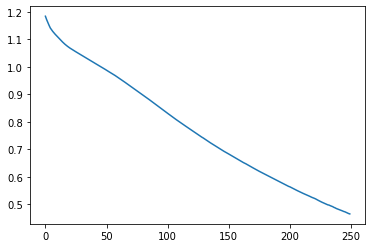

In [48]:
plt.plot(loss_df['loss'])

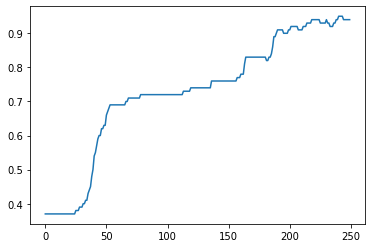

In [49]:
plt.plot(loss_df['accuracy'])

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [63]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [64]:
predictions=model.predict_classes(X_test)
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 1])

In [67]:
y_test=iris_data.target
print(accuracy_score(y_test,predictions))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
print(classification_report(y_test,predictions))